<a href="https://colab.research.google.com/github/xiiiq/portfolio/blob/main/Proyecto_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### Get Data

In [ ]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
59,5.2,2.7,3.9,1.4,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
72            6.3          2.5           4.9          1.5
111           6.4          2.7           5.3          1.9
137           6.4          3.1           5.5          1.8
69            5.6          2.5           3.9          1.1
147           6.5          3.0           5.2          2.0

 Target 

149     Iris-virginica
145     Iris-virginica
123     Iris-virginica
50     Iris-versicolor
82     Iris-versicolor
Name: target, dtype: object


### Visualize Data

In [ ]:

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

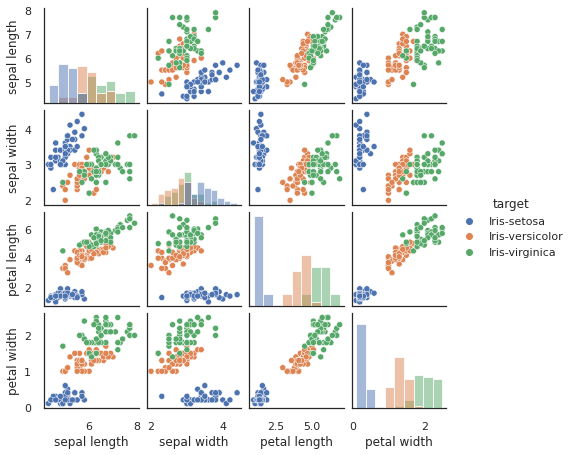

In [ ]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!!

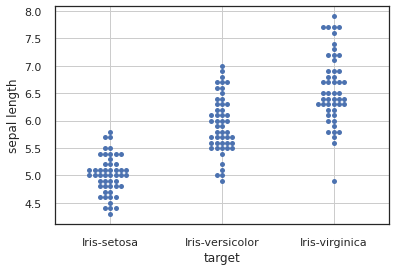

In [ ]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()


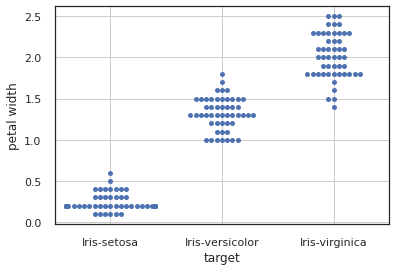

In [ ]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width,
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

# Celda para completar código

In [ ]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS
# GENERAR UN VECTOR CON LOS VALORES DE X ESCALADOS LLAMADO X_scaled_array
# EN EL OUTPUT PUEDEN VER COMO DEBERIA QUEDAR EL DATAFRAME

scaler.fit(X) # Calculamos la media y la desv estándar que se usarán para el vector posterior.
X_scaled_array = scaler.transform(X) # Almacenamos los datos normalizados en "X_scaled_array", respetamos el nombre del vector porque se hace referencia a él más tarde.


X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
2,-1.385353,0.337848,-1.398138,-1.312977
92,-0.052506,-1.050569,0.137236,0.001753
33,-0.416010,2.651878,-1.341272,-1.312977
86,1.038005,0.106445,0.535296,0.396172
77,1.038005,-0.124958,0.705893,0.659118
123,0.553333,-0.819166,0.649027,0.790591
131,2.492019,1.726266,1.502013,1.053537
40,-1.021849,1.032057,-1.398138,-1.181504
145,1.038005,-0.124958,0.819624,1.447956
46,-0.900681,1.726266,-1.227541,-1.312977


### Silhouette score & Elbow Method

un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

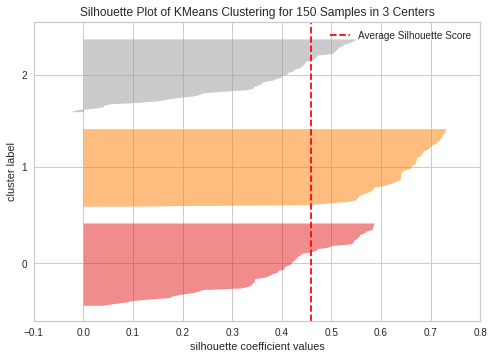

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
#pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


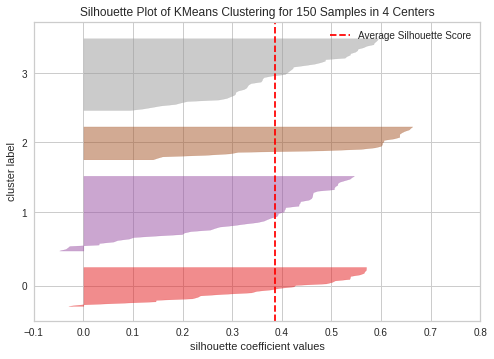

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
#pip install yellowbrick


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

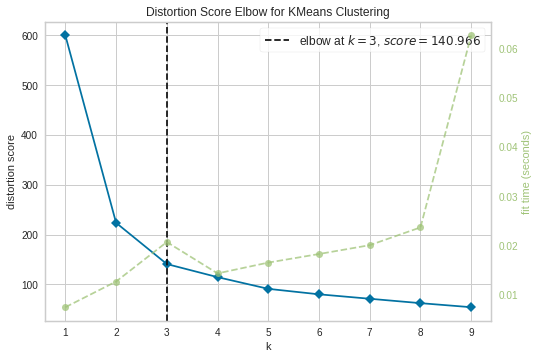

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

# Celda para completar código

In [ ]:

from sklearn.cluster import KMeans

nclusters = 3 # Se define el número de clústers recomendado por los análisis anteriores
seed = 0      # Se definen los números aleatorios bajo la semilla = 0

#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.
#Complete aqui, llamando al metodo de K-means para entrenar el modelo utilizando las variables ncluster y seed
#Utilice X_Scaled para entrenar el modelo

km = KMeans(n_clusters=nclusters    #Utilizamos el método de K-means con las dos variables anteriores y añadimos algunos argumentos adicionales como en los ejemplos anteriores
            , init = 'k-means++'    #Utilizamos la inicialización inteligente de Kmeans++
            , max_iter=500          #Número máximo de iteraciones permitido para el algoritmo antes de que se detenga.
            , n_init=10             #Número de veces que se ejecuta el algoritmo con diferentes centroides iniciales
            , random_state=seed)

km.fit(X_scaled)                    #Ajustamos el modelo con los datos escalados


# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)

print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características).
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

# Celda para completar código

In [ ]:

from sklearn.decomposition import PCA

ndimensions = 2 #Se indica el número de dimensiones al que queremos reducir

#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimension

pca = PCA(n_components=ndimensions, random_state=seed) #Aplicamos el algoritmo de PCA con las 2 dimensiones anteriores y mentenemos la misma semilla
pca.fit(X_scaled) #Ajustamos nuevamente el modelo
X_pca_array = pca.transform(X_scaled) #Transformamos el conjunto de datos escalados "X_scaled" a las 2 dimensiones del objeto "pca" dentro de la variable indicada "X_pca_array"


X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2'])


print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
68                1.215303              -1.633356
100               1.847673               0.871697
58                0.926222               0.030331
64               -0.037258              -0.432795
7                -2.233842               0.247614
72                1.227988              -0.940915
33               -2.437951               2.185392
113               1.253087              -1.167391
103               1.438685              -0.050011
2                -2.367950              -0.318477


 explained_variance
[0.72770452 0.23030523]


Tenemosnuevas coordenadas 2D para cada punto de datos.
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones.



In [ ]:

finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
128,1.786009,-0.193273,Iris-virginica,2
29,-2.268790,-0.314879,Iris-setosa,1
66,0.348006,-0.190622,Iris-versicolor,0
64,-0.037258,-0.432795,Iris-versicolor,0
12,-2.224083,-0.709118,Iris-setosa,1
42,-2.557834,-0.453816,Iris-setosa,1
17,-2.190179,0.514304,Iris-setosa,1
15,-2.251465,2.722371,Iris-setosa,1
91,0.623171,0.027543,Iris-versicolor,0
123,1.329194,-0.486761,Iris-virginica,0


### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

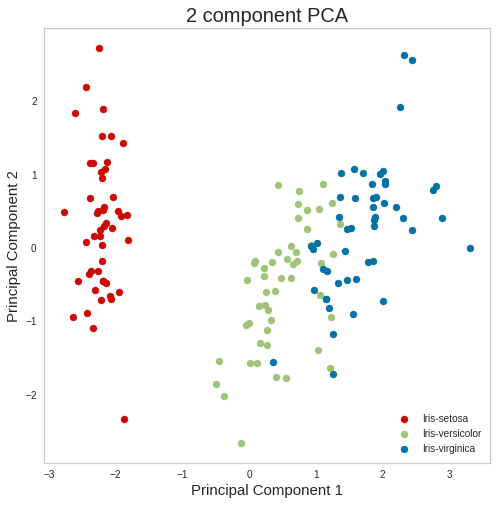

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

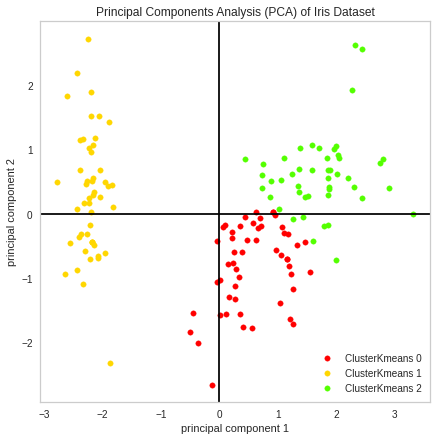

In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"

    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure,
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter',
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')


## Introduzca una conclusión de los resultados obtenidos

In [ ]:
#CONCLUSION DEL ANALISIS DESARROLLADO:

Realizaremos las conclusiones paso a paso del análisis realizado:

- En primer lugar hemos cargado el conjunto de datos de Iris en un DataFrame y lo hemos dividido en las instancias (X) y etiquetas (y).

- Ahora podríamos iniciar nuestro análisis para la implementación de clústeres, pero tenemos una pequeña objeción que debemos corregir. Si nosotros hubiéramos entrenado el modelo con la información original, le hubiéramos dado más importancia a aquellas variables cuya escala era mayor en referencia a las demás debido a que el algoritmo Kmeans es sensible a las escalas de medida porque trabaja con distancias. De esa manera, las variables con valores más bajos tendrían menos impacto en la formación de los clústeres. Entonces, para dar la misma importancia a todas las variables, hemos escalado los datos de características utilizando el método StandardScaler() de la biblioteca sklearn.

- Una vez hemos escalado los datos, hemos determinado el número óptimo de grupos utilizando el método del codo y el de silueta. Hemos observado por el metodo de ELBOW que tenemos que utilizar un K=3, o lo que es lo mismo, 3 clusters.

- A continuación, hemos utilizado el método KMeans() para crear un modelo de agrupación en clústeres de KMeans y lo hemos ajustado a los datos escalados. Hemos utilizado el método de inicialización kmeans++, para evitar cualquier tipo de solución local como podría ocurrir utilizando kmeans standard. De manera que se eligen los centroides iniciales de manera inteligente para mejorar la convergencia del algoritmo.

- Y finalmente, una vez definidos los clústeres, hemos transformado de 4D a 2D las caracteristicas para poder visualizarlas en un grafico y poder observar los clusters. Hemos utilizado el Análisis de Componentes Principales "PCA" para reducir la dimensionalidad de los datos a 2D y posteriormente hemos realizado un gráfico de dispersión donde los ejes x e y eran las componentes principales y los puntos eran las instancias diferenciadas en el color del target al que pertenecían.

Como conclusión final podemos destacar lo que nos indica el profesor al final del análisis: Kmeans y PCA son útiles para generar clasificaciones específicas cuando no se tienen las etiquetas de antemano. Sin embargo, la división entre las especies de Versicolor y Virgínicas es algo más complicada a vista de lo que hemos visto en los gráficos obtenidos después de aplicar Kmeans y PCA. Por tanto, estas técnicas son muy útiles pero también podemos observar ciertas limitaciones en ocasiones, por lo que quizá sea preferible contar con más datos o con más características para poder realizar una clasificación todavía más precisa.

De manera adicional, podemos señalar lo que sucede en la última celda de código, en donde se encuentra otra forma de clasificación en donde parece que se identifican algo mejor los clústeres. Se le aplica una línea horizontal y parece diferenciarse algo mejor cada uno de los clústers.

## Opcional: Otros algoritmos de clustering. Agglomerative Hierarchical Clustering

Vamos a probar con Agglomerative Hierarchical Clustering, porque a pesar de ser más complejo, no disponemos de una cantidad enorme de datos y podemos probar sin que sea sumamente costoso computacionalmente.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# En primer lugar no pondremos hiperparámetros para ver qué es lo que obtenemos.
ahc = AgglomerativeClustering()
ahc.fit(X_scaled)

AgglomerativeClustering()

In [ ]:
#Reducimos la dimensionalidad de los datos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

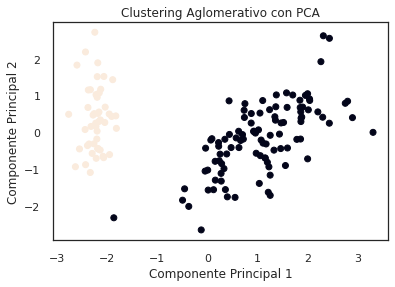

In [ ]:
#Graficamos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ahc.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering Aglomerativo con PCA')
plt.show()

Parece que el algoritmo subdivide en dos clústeres que parecen ser claramente diferenciados. Posteriormente aplicaremos el algoritmo con 3 clústeres puesto que conocemos que el número óptimo de agrupaciones no es dos sino tres.

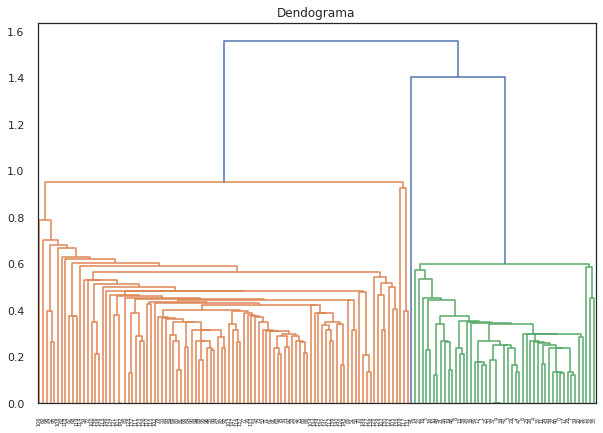

In [ ]:
#Ahora ejecutaremos el código necesario para cargar el dendograma
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(X_scaled))
plt.show()

Vemos cómo ha ido agrupando el algoritmo los diferentes datos paso a paso. No podemos sacar muchas interpretaciones en base al resultado visual anterior, simplemente podemos observar cómo ha ido paso a paso agrupando las instancias en base a los elementos más cercanos.

Como hemos dicho, vamos a ajustar el algoritmo anterior con otros hiperparámetros para ver cómo se desempeña

##Agglomerative Hierarchical Clustering con hiperparámetros

In [ ]:
#Sabemos que el número de clústeres óptimo es 3, utilizaremos la distancia euclidiana y el enlace ward como hemos visto en el ppt de las clases
ahc2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ahc2.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
#Reducimos dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

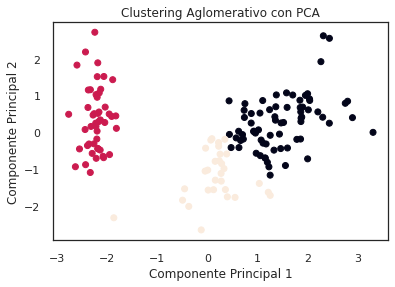

In [ ]:
#Graficamos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ahc2.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering Aglomerativo con PCA')
plt.show()

Podemos apreciar en el gráfico anterior cómo se distribuyen los puntos del conjunto de datos sobre las dos componentes resultado de PCA sobre el clústering jerárquico aglomerativo. Parece haber nuevamente una fina diferenciación entre dos grupos e incluso puede establecerse una diferenciación ligeramente más perceptible con este nuevo algoritmo.

Al emplear el nuevo algoritmo, podemos concluir que, en un primer momento es cómodo implementarlo sin necesidad de establecer hiperparámetros. Pero posteriormente, ajustando algunas informaciones previas que disponíamos (3 clústeres) observamos que identificamos 3 grupos distintos y que la diferenciación entre dos de las agrupaciones sigue siendo algo compleja, aunque visualmente parezca que hay una mejor diferenciación entre dos de las agrupaciones que en el caso de Kmeans.

Como señalábamos en el modelo anterior, es más que probable que mejore la diferenciacion entre las agrupaciones si introducimos más datos o más características.